# tpot

- https://github.com/EpistasisLab/tpot
- http://epistasislab.github.io/tpot/

In [2]:
%%time
# uncomment this first pip uninstall line for Azure Notebooks
#!pip uninstall -y scikit-image azureml-train-automl azureml-opendatasets azureml-automl-core

# rest of these lines are appropriate for both Azure Notebooks and VSCode with default new Anaconda3 environment
!pip install deap update_checker tqdm stopit matplotlib
#!pip install xgboost
!pip install tpot

# ~6.5 minutes on free Azure Notebooks & MyBinder
# 1 minute on beefy workstation
# 2.5 minutes on i7-6560 + NVMe SSD ultrabook 

Wall time: 3.45 s


In [3]:
%%time
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

Wall time: 6.23 s


In [4]:
#%%time
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

<Figure size 432x288 with 0 Axes>

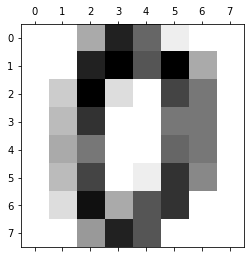

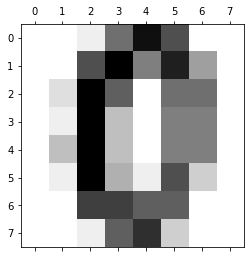

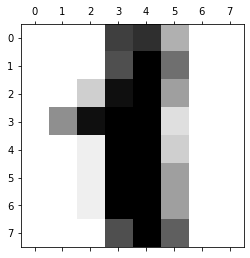

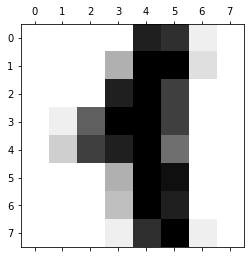

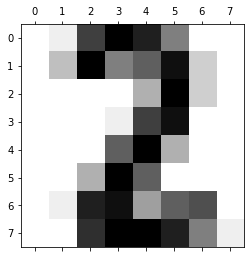

Wall time: 1.2 s


In [5]:
%%time
import matplotlib.pyplot as plt
plt.gray()
plt.set_cmap('gray_r')
plt.matshow(digits.images[0])
plt.show()
plt.matshow(digits.images[10])
plt.show()
plt.matshow(digits.images[1])
plt.show()
plt.matshow(digits.images[11])
plt.show()
plt.matshow(digits.images[1234])
plt.show()

train_test_split outputs:

- X_train: Training Data
- X_test: Testing Data
- y_train: Training Answers
- y_test: Testing Answers

In [6]:
%%time
#training_features, testing_features, training_target, testing_target
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=42,
    train_size=0.05, test_size=0.25)
#   train_size=0.75, test_size=0.25)

Wall time: 2 ms


In [7]:
%%time
tpot = TPOTClassifier(generations=1, population_size=50, verbosity=2, random_state=42)
#tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

Wall time: 0 ns


In [8]:
%%time
tpot.fit(X_train, y_train)

# train_size=0.05, generations=1:
# ~15 minutes on free Azure Notebook & MyBinder (when it works - MyBinder seems buggy)
# ~1 minute on beefy workstation - 85-87% accurate
# ~2-3 minutes on i7/ssd ultrabook

# train_size=0.75, generations=5:
# ?? on free Azure Notebook & MyBinder (no thanks)
# ~24 minutes on beefy workstation - 98.3-98.9% accurate

Optimization Progress: 100%|██████████| 100/100 [01:48<00:00,  1.33s/pipeline]Generation 1 - Current best internal CV score: 0.8565873015873017

Best pipeline: LogisticRegression(input_matrix, C=25.0, dual=False, penalty=l1)
Wall time: 1min 55s


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=1,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [9]:
%%time
print(tpot.score(X_test, y_test))

0.8666666666666667
Wall time: 12 ms


In [10]:
%%time
tpot.export('tpot_digits_pipeline.gen.py')

Wall time: 3.98 ms
